<a href="https://colab.research.google.com/github/Pavanvarma007/-Pavan_INFO5731_Spring2023/blob/main/Programming_Assignment_02_INFO_5505.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 

Implementing neural networks from scratch

define the sigmoid function and its derivative function

In [2]:
def sigmoid(z) :
  return 1.0 / (1 + np. exp(-z))
def sigmoid_derivative(z) :
  return sigmoid(z) * (1.0 - sigmoid(z))

define the training function, which takes 
in the training dataset, the number of units in the hidden layer and the 
number of iterations

In [3]:
def train(X, y, n_hidden, learning_rate, n_iter):
  m, n_input = X.shape
  W1 = np.random.randn(n_input, n_hidden)
  b1 = np.zeros((1, n_hidden))
  W2 = np.random.randn(n_hidden, 1)
  b2 = np.zeros((1, 1))
  for i in range(1, n_iter+1):
    Z2 = np.matmul(X, W1) + b1
    A2 = sigmoid(Z2)
    Z3 = np.matmul (A2, W2) + b2
    A3 = Z3
    dZ3 = A3 - y
    dW2 = np.matmul(A2.T, dZ3)
    db2 = np.sum(dZ3, axis=0, keepdims=True)
    dZ2 = np.matmul(dZ3, W2.T) * sigmoid_derivative (Z2)
    dW1 = np.matmul(X.T, dZ2)
    db1 = np.sum(dZ2, axis=0)
    W2 = W2 - learning_rate * dW2 / m
    b2 = b2 - learning_rate * db2 / m
    W1 = W1 - learning_rate * dW1 / m
    b1 = b1 - learning_rate * db1 / m
    if i % 100 == 0:
      cost = np.mean((y - A3) ** 2)
      print ('Iteration %i, training loss: %f' % (i,cost))
  model={"W1":W1, "b1":b1, "W2":W2 ,"b2":b2 }
  return model

In [4]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [5]:
num_test = 10 # the last 10 samples as testing set
from sklearn import preprocessing
scaler = preprocessing. StandardScaler ()
X_train = data[: -num_test, :]
X_train = scaler.fit_transform(X_train)
y_train = target[:-num_test].reshape(-1, 1)
X_test = data[-num_test:, :]
X_test = scaler.transform(X_test)
y_test = target [-num_test: ]

In [6]:
n_hidden = 20
learning_rate = 0.1
n_iter = 2000
model = train(X_train, y_train, n_hidden, learning_rate, n_iter)

Iteration 100, training loss: 13.471024
Iteration 200, training loss: 9.581926
Iteration 300, training loss: 7.993478
Iteration 400, training loss: 6.899583
Iteration 500, training loss: 6.230106
Iteration 600, training loss: 5.768195
Iteration 700, training loss: 5.430610
Iteration 800, training loss: 5.165193
Iteration 900, training loss: 4.941881
Iteration 1000, training loss: 4.745280
Iteration 1100, training loss: 4.567559
Iteration 1200, training loss: 4.401209
Iteration 1300, training loss: 4.237478
Iteration 1400, training loss: 4.067532
Iteration 1500, training loss: 3.867281
Iteration 1600, training loss: 3.689823
Iteration 1700, training loss: 3.546526
Iteration 1800, training loss: 3.417678
Iteration 1900, training loss: 3.298614
Iteration 2000, training loss: 3.188356


In [7]:
def predict(x, model) :
  W1 = model['W1']
  b1 = model['b1']
  W2 = model['W2']
  b2 = model['b2']
  A2 = sigmoid(np.matmul(x, W1) + b1)
  A3 = np. matmul (A2, W2) + b2
  return A3

In [8]:
predictions=predict(X_test,model)

In [9]:
print(predictions)

[[18.7618836 ]
 [18.62083296]
 [20.69629527]
 [19.22456916]
 [18.84648381]
 [23.1075823 ]
 [23.15488438]
 [30.68909331]
 [28.23864679]
 [23.15492525]]


In [10]:
print(y_test)

[19.7 18.3 21.2 17.5 16.8 22.4 20.6 23.9 22.  11.9]


Implementing neural networks with scikit-learn

In [11]:
from sklearn.neural_network import MLPRegressor
nn_scikit = MLPRegressor (hidden_layer_sizes=(16, 8),activation='relu', solver= 'adam',learning_rate_init=0.001, random_state=42, max_iter=2000)

In [12]:
nn_scikit.fit(X_train, y_train)
predictions = nn_scikit.predict(X_test)
print(predictions)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[16.79582331 18.55538023 21.07961496 19.21362606 18.50955771 23.5608387
 22.27916529 27.11909153 24.70251262 22.05522035]


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [13]:
print(np.mean((y_test - predictions)**2))

13.933482332708795


Implementing neural networks with TensorFlow

In [14]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(42)

In [15]:
model = keras.Sequential([keras.layers.Dense(units=20, activation='relu'),
                          keras.layers.Dense(units=8,activation= 'relu'),
                          keras.layers.Dense(units=1)])

In [16]:
model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(0.02))

In [17]:
model.fit (X_train,y_train,epochs=300)

Epoch 1/300
16/16 [==============================] - 1s 3ms/step - loss: 511.1687
Epoch 2/300
16/16 [==============================] - 0s 2ms/step - loss: 158.4610
Epoch 3/300
16/16 [==============================] - 0s 2ms/step - loss: 55.7038
Epoch 4/300
16/16 [==============================] - 0s 2ms/step - loss: 31.0970
Epoch 5/300
16/16 [==============================] - 0s 2ms/step - loss: 25.8157
Epoch 6/300
16/16 [==============================] - 0s 2ms/step - loss: 21.2937
Epoch 7/300
16/16 [==============================] - 0s 3ms/step - loss: 19.0666
Epoch 8/300
16/16 [==============================] - 0s 2ms/step - loss: 17.1438
Epoch 9/300
16/16 [==============================] - 0s 2ms/step - loss: 15.0633
Epoch 10/300
16/16 [==============================] - 0s 2ms/step - loss: 13.5139
Epoch 11/300
16/16 [==============================] - 0s 2ms/step - loss: 12.3889
Epoch 12/300
16/16 [==============================] - 0s 2ms/step - loss: 12.0364
Epoch 13/300
16/16 [===

In [18]:
predictions = model.predict(X_test)[:, 0]
print(predictions)
print(np.mean((y_test - predictions) ** 2))

1/1 [==============================] - 0s 109ms/step
[17.303087 18.679602 20.435934 18.737612 19.050352 26.506218 23.52595
 30.40733  28.05226  23.048542]
24.175623030929348


 Predicting stock prices with neural networks

In [20]:
data_raw = pd.read_csv('/content/dataset.csv', index_col='Date')

In [21]:
def add_original_feature(df, df_new):
    df_new['open'] = df[ 'Open']
    df_new['open_1'] = df['Open'].shift (1)
    df_new['close_1'] = df['Close'].shift(1)
    df_new['high_1'] = df['High'].shift (1)
    df_new['low_1'] = df['Low' ].shift(1)
    df_new['volume_1'] = df[ 'Volume'].shift(1)

In [22]:
def add_avg_price(df, df_new) :
    df_new['avg_price_5'] = df['Close'].rolling(5).mean().shift(1)
    df_new['avg_price_30'] = df['Close'].rolling(21) .mean().shift (1)
    df_new['avg_price_365'] = df['Close'].rolling(252).mean().shift(1)
    df_new['ratio_avg_price_5_30'] = df_new['avg_price_5'] / df_new['avg_price_30']
    df_new['ratio_avg_price_5_365'] = df_new['avg_price_5'] / df_new['avg_price_365']
    df_new['ratio_avg_price_30_365'] = df_new[ 'avg_price_30'] / df_new['avg_price_365']

In [23]:
def add_avg_volume(df, df_new):
    df_new['avg_volume_5'] =df['Volume'].rolling(5).mean().shift(1)
    df_new['avg_volume_30'] =df['Volume'].rolling(21).mean().shift(1)
    df_new['avg_volume_365'] =df['Volume'].rolling(252).mean().shift (1)
    df_new['ratio_avg_volume_5_30']=df_new['avg_volume_5'] / df_new['avg_volume_30']
    df_new['ratio_avg_volume_5_365'] =df_new['avg_volume_5'] / df_new['avg_volume_365']
    df_new['ratio_avg volume_30_365'] =df_new['avg_volume_30'] / df_new['avg_volume_365']

In [24]:
def add_std_price(df, df_new):
    df_new['std_price_5'] =df['Close'].rolling (5).std().shift(1)
    df_new['std_price_30'] =df['Close'].rolling(21).std().shift(1)
    df_new['std_price_365'] =df['Close'].rolling(252).std().shift(1)
    df_new['ratio_std_price_5_30']=df_new['std_price_5'] / df_new['std_price_30']
    df_new['ratio_std_price_5_365'] =df_new['std_price_5'] / df_new['std_price_365'] 
    df_new['ratio_std_price_30_365'] =df_new['std_price_30'] / df_new['std_price_365']

In [25]:
def add_std_volume(df, df_new):
    df_new['std_volume_5'] =df['Volume'].rolling(5).std().shift(1)
    df_new['std_volume_30'] =df['Volume'].rolling(21) .std().shift(1)
    df_new['std_volume_365'] =df['Volume'].rolling(252).std().shift(1)
    df_new['ratio_std_volume_5_30'] =df_new['std_volume_5'] / df_new['std_volume_30']
    df_new['ratio_std_volume_5_365'] =df_new['std_volume_5'] / df_new['std_volume_365']
    df_new['ratio_std_volume_30_365'] =df_new['std_volume_30'] / df_new['std_volume_365']

In [26]:
def add_return_feature(df, df_new):
    df_new['return_1'] = ((df['Close'] - df['Close']. shift (1))/ df['Close'].shift(1)).shift(1)
    df_new['return_5'] = ((df['Close'] - df['Close'].shift(5))/ df[ 'Close'].shift (5)).shift(1)
    df_new['return_30'] = ((df['Close'] -df['Close'].shift (21)) / df['Close'].shift (21)) .shift(1)
    df_new['return_365'] = ((df['Close'] -df['Close'].shift (252)) / df['Close'].shift (252)) .shift(1)
    df_new['moving_ave_5'] =df_new['return_1'].rolling(5).mean().shift(1)
    df_new['moving_avg_30'] =df_new['return_1'].rolling(21).mean().shift(1)
    df_new['moving_avg_365'] =df_new['return_1'].rolling(252).mean().shift(1)

In [27]:
def generate_features (df):
    df_new = pd.DataFrame ()
    add_original_feature(df, df_new)
    add_avg_price(df, df_new)
    add_avg_volume(df, df_new)
    add_std_price(df, df_new)
    add_std_volume(df, df_new)
    add_return_feature(df, df_new)
    df_new['close'] = df['Close']
    df_new = df_new.dropna(axis=0)
    return df_new

In [28]:
data = generate_features (data_raw)

In [29]:
data

,open,open_1,close_1,high_1,low_1,volume_1,avg_price_5,avg_price_30,avg_price_365,ratio_avg_price_5_30,...,ratio_std_volume_5_365,ratio_std_volume_30_365,return_1,return_5,return_30,return_365,moving_ave_5,moving_avg_30,moving_avg_365,close
Date,,,,,,,,,,,,,,,,,,,,,
1930-12-05,181.00,184.10,181.00,184.10,179.80,179324.0,184.158,184.816190,239.677937,0.996439,...,0.262171,0.460315,-0.016839,-0.013086,0.020869,-0.325633,0.003565,0.002995,-0.001334,181.10
1930-12-06,180.60,181.00,181.10,181.70,177.30,179324.0,183.700,184.849524,239.339048,0.993781,...,0.181719,0.404141,0.000552,-0.012487,0.003880,-0.320450,-0.002567,0.001094,-0.001420,178.40
1930-12-08,178.00,180.60,178.40,180.60,177.60,159699.0,182.280,184.582857,238.981508,0.987524,...,0.124114,0.401101,-0.014909,-0.038275,-0.030435,-0.335568,-0.002445,0.000288,-0.001390,176.10
1930-12-09,176.10,178.00,176.10,178.00,174.30,223309.0,180.140,184.078095,238.600556,0.978606,...,0.214120,0.307919,-0.012892,-0.057281,-0.056776,-0.352811,-0.007728,-0.001372,-0.001479,176.50
1930-12-10,176.50,176.10,176.50,178.20,173.90,239098.0,178.620,183.887619,238.235079,0.971354,...,0.226450,0.307424,0.002271,-0.041282,-0.022161,-0.342889,-0.011708,-0.002685,-0.001583,174.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-06,33425.32,33076.33,33390.97,33405.82,33008.41,304499671.0,32920.434,33537.156667,32674.986389,0.981611,...,0.315063,0.529048,0.011738,0.017493,-0.020590,-0.014764,-0.000882,-0.001507,0.000040,33431.44
2023-03-07,33428.31,33425.32,33431.44,33572.22,33383.47,332530856.0,33028.904,33507.513810,32673.545040,0.985716,...,0.150927,0.416379,0.001212,0.016490,-0.018280,-0.010748,0.003498,-0.000958,0.000016,32856.46
2023-03-08,32872.08,33428.31,32856.46,33453.25,32838.21,302316239.0,33068.856,33456.582857,32670.535754,0.988411,...,0.160361,0.308294,-0.017199,0.006117,-0.031526,-0.022560,0.003301,-0.000846,0.000032,32798.40


In [30]:
start_train = '1988-01-01'
end_train = '2018-12-31'
start_test = '2019-01-01'
end_test = '2019-12-31'
data_train = data.loc[start_train:end_train]
X_train = data_train.drop('close', axis=1).values
y_train = data_train['close'].values
data_test = data.loc[start_test:end_test]
X_test = data_test.drop('close', axis=1).values
y_test = data_test ['close'].values

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [32]:
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)
y_train

array([ 2015.3 ,  2031.5 ,  2037.8 , ..., 23138.82, 23062.4 , 23327.46])

In [33]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
model = Sequential([
Dense (units=32, activation='relu'),
Dense (units=1)])

In [35]:
model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(0.1))

In [36]:
model.fit(X_scaled_train,y_train, epochs=100, verbose=True)
predictions=model.predict(X_scaled_test)

Epoch 1/100
245/245 [==============================] - 1s 2ms/step - loss: 27908782.0000
Epoch 2/100
245/245 [==============================] - 1s 2ms/step - loss: 1850590.6250
Epoch 3/100
245/245 [==============================] - 0s 2ms/step - loss: 539293.1250
Epoch 4/100
245/245 [==============================] - 0s 2ms/step - loss: 188518.0000
Epoch 5/100
245/245 [==============================] - 0s 2ms/step - loss: 81358.6875
Epoch 6/100
245/245 [==============================] - 0s 2ms/step - loss: 45569.5781
Epoch 7/100
245/245 [==============================] - 0s 2ms/step - loss: 31609.2012
Epoch 8/100
245/245 [==============================] - 1s 2ms/step - loss: 25805.3438
Epoch 9/100
245/245 [==============================] - 1s 3ms/step - loss: 24370.2578
Epoch 10/100
245/245 [==============================] - 2s 8ms/step - loss: 23580.1484
Epoch 11/100
245/245 [==============================] - 1s 4ms/step - loss: 24060.1562
Epoch 12/100
245/245 [=======================

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(f'MSE: {mean_squared_error(y_test,predictions): .3f}')
print (f'MAE: {mean_absolute_error(y_test, predictions): .3f}')
print (f'R^2: {r2_score (y_test, predictions) : .3f}')

MSE:  102859.078
MAE:  267.266
R^2:  0.911


In [38]:
from tensorboard.plugins.hparams import api as hp

In [39]:
HP_HIDDEN = hp.HParam('hidden_size', hp.Discrete([64, 32, 16]))
HP_EPOCHS = hp.HParam('epochs', hp.Discrete ([300, 1000]))
HP_LEARNING_RATE = hp.HParam ('learning_rate',hp.RealInterval(0.01, 0.4))

In [40]:
def train_test_model(hparams, logdir):
    model = Sequential ([
        Dense(units=hparams[HP_HIDDEN], activation='relu'),Dense(units=1)])
    model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(hparams[HP_LEARNING_RATE]),
                    metrics=['mean_squared _error'])
    model.fit(X_scaled_train, y_train,
                validation_data=(X_scaled_test, y_test),
              epochs=hparams [HP_EPOCHS], 
              verbose=False, 
              callbacks=[tf.keras.callbacks.TensorBoard(logdir),
                         hp.KerasCallback(logdir, hparams),
                         tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0,patience=200,verbose=0,mode='auto')])
    _,mse = model.evaluate(X_scaled_test, y_test)
    pred = model.predict(X_scaled_test)
    r2 = r2_score (y_test, pred)
    return mse, r2

In [41]:
def run (harams, logdir):
    with tf.summary.create_file_writer(logdir).as_default() :
        hp.hparams_config(hparams=[HP_HIDDEN, HP_EPOCHS, HP_LEARNING_RATE], 
                          metrics=[hp.Metric('mean_squared_error',display_name= 'mse'),
                                             hp.Metric('r2', display_name='r2')])
    mse, r2 = train_test_model(hparams, logdir)
    tf.summary.scalar('mean_squared _error',mse, step=1)
    tf.summary.scalar('r2', r2, step=1)
    for hidden in HP_HIDDEN.domain.values:
        for epochs in HP_EPOCHS.domain.values:
            for learning_rate in tf.linspace(HP_LEARNING_RATE.domain.min_value,
                                         HP_LEARNING_RATE.domain.max_value, 5):
                hparams = {
                    HP_HIDDEN: hidden,
                    HP_EPOCHS: epochs,
                    HP_LEARNING_RATE:float ('%.2f'%float(learning_rate))}
                run_name = 'run-%d' % session_num
                print(' --- Starting trial: %s' % run_name)
                print({h.name: hparams[h] for h in hparams})
                run(hparams,'logs/hparam_tuning/' + run_name)
                session_num += 1

In [42]:
!tensorboard --logdir=/content/logs/hparam_tuning --port=6006!

2023-03-17 02:25:41.821350: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-17 02:25:41.821469: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-17 02:25:41.821487: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
usage: tensorboard
       [-h]
       [--helpfull]
       [--logdir PATH]
       [--logdir_spec PATH_SPEC]
    

In [44]:
model = Sequential ([Dense(units=16, activation='relu'),Dense(units=1)])
model.compile(loss= 'mean_squared_error',optimizer=tf.keras.optimizers.Adam(0.21))
model.fit(X_scaled_train, y_train, epochs=1000, verbose=False)
predictions = model.predict(X_scaled_test)[:, 0]

8/8 [==============================] - 0s 2ms/step


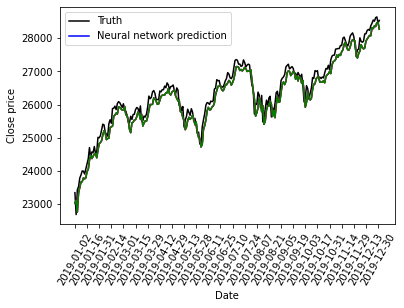

In [45]:
import matplotlib.pyplot as plt
plt.plot(data_test.index, y_test, c='k')
plt.plot(data_test.index, predictions, c='b')
plt.plot(data_test.index, predictions, c='r')
plt.plot(data_test.index, predictions, c='g')
plt.xticks (range(0, 252, 10), rotation=60)
plt.xlabel('Date')
plt.ylabel('Close price')
plt.legend(['Truth', 'Neural network prediction' ])
plt.show()